## Hypothesis Testing Examples using Insurance Dataset

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
insurance =pd.read_csv('insurance.csv')

In [22]:
insurance.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# One Way ANOVA

In [13]:
model = smf.ols('charges~C(region)', data = insurance).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(region),1.300760e+09,3.0,2.969627,0.030893
Residual,1.947735e+11,1334.0,NaN,NaN


- H0: not significantly different
- H1: significantly different
- alpha = 0.05

To conclude, Charges are siginifcantly different based on region.

In [17]:
#To know which combination of regions are significantly different, we will do a tukey comparison test.
# If zero is within the interval, then it is not significantly different.
mcTreatment = multi.MultiComparison(insurance['charges'], insurance['region'])
results_treatment = mcTreatment.tukeyhsd()
results_treatment.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7002,-3428.9473,1451.329,False
northeast,southeast,1329.0269,0.4754,-1044.9543,3703.0081,False
northeast,southwest,-1059.4471,0.6584,-3499.5853,1380.691,False
northwest,southeast,2317.8361,0.0583,-54.212,4689.8842,False
northwest,southwest,-70.638,0.9,-2508.8955,2367.6195,False
southeast,southwest,-2388.4741,0.0477,-4760.5221,-16.426,True


To conclude, zero is not within the interval of southeast and southwest. There is a significant difference in charges in those two regions.

Text(0.5, 1.0, 'Comparing Charges by Region')

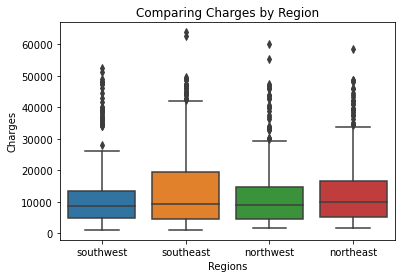

In [20]:
#Box plot to compare charges by region.
sns.boxplot(x = 'region', y = 'charges', data = insurance)
plt.xlabel('Regions')
plt.ylabel('Charges')
plt.title('Comparing Charges by Region')

# Chi Squared Test of Indpendence

In [24]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(insurance['sex'],insurance['region'], values = insurance['bmi'], aggfunc = sum)
contingency

region,northeast,northwest,southeast,southwest
sex,,,,
female,4721.215,4801.585,5717.47,4869.8
male,4731.000,4688.345,6424.11,5074.1


In [27]:
chi2, p ,dof, expected = chi2_contingency(contingency)
p

9.344836684300926e-07

- H0: independent
- H1: not independent
- alpha = 0.05

To conclude, sex and region are not independent of each other. BMI is different by sex in different regions.

# Two Tailed T-Test

In [28]:
female = insurance[insurance['sex'] == 'female']
male = insurance[insurance['sex'] == 'male']

In [31]:
stats.normaltest(female['bmi'])

NormaltestResult(statistic=8.702256368506658, pvalue=0.012892259528571495)

In [34]:
stats.normaltest(male['bmi'])

NormaltestResult(statistic=11.546500396815057, pvalue=0.0031096341436536996)

- H0: Not normally distributed
- H1: Normally Distributed
- alpha = 0.05

To conclude, both p-values for male and female are less than 0.05. We reject the null hypothesis. Both female and male bmi's come from a normal distribtution.

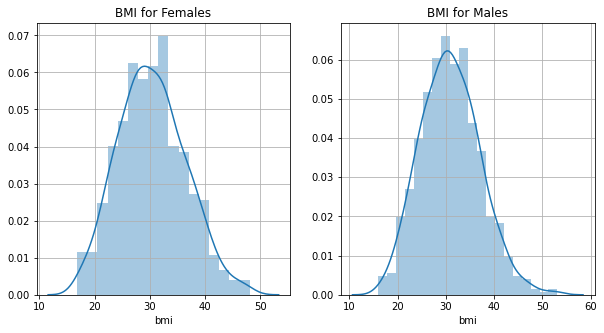

In [43]:
# We can show this with a disribution plot.
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(female['bmi'])
plt.title('BMI for Females')
plt.grid()

plt.subplot(1,2,2)
sns.distplot(male['bmi'])
plt.title('BMI for Males')
plt.grid()

# Equality of Variance

In [45]:
ttest, p = stats.levene(female['bmi'], male['bmi'], center = 'mean')
p

0.9560299025144636

- H0: Variances are equal
- H1: Variances are not equal
- alpha = 0.05

To conclude p-value is greater than 0.05. We fail to reject the null hypothesis. The variances between female bmi and male bmi are the same.

In [47]:
#continuation of T-Test

ttest, p = stats.ttest_ind(female['bmi'], male['bmi'], equal_var = True)
p

0.08997637178984934

- H0: Means are equal
- H1: Means are not equal
- alpha = 0.05

To conclude, p-value is greater than 0.05. We fail to reject the null hypothesis. Female bmi and male bmi are equivalent.

In [50]:
# To check this we can take the means if female bmi and male bmi

female_average_bmi = female['bmi'].mean()
male_average_bmi = male['bmi'].mean()
print("female : ", female_average_bmi, "Male : ", male_average_bmi)

female :  30.377749244713023 Male :  30.943128698224832


From the computed means we can tell that both means are just about equivalent.